# Subtask 1: Shift the columns/rows of a picture cyclically
# Subtask 2: Plot speedup vs number of processes
# Subtask 3: Plot memory consumption vs number of processors

In [454]:
%%writefile shifted_picture.py

from PIL import Image
import numpy as np
from mpi4py import MPI
import time
import tracemalloc

time_start = time.time()
tracemalloc.start()

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

image = Image.open('moscow.png')
arr_image = np.asarray(image)

height = arr_image.shape[0]
width = arr_image.shape[1]

index = np.linspace(0, width, size + 1, dtype = int)
width_rank = index[rank + 1] - index[rank]
image_rank = arr_image[:, index[rank]:index[rank+1]]

image_temp = np.roll(image_rank, 300, axis = 0)

data = comm.gather(image_temp, root = 0)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
peak = np.array(comm.gather(peak, root = 0))
   
if rank == 0:
    value = np.concatenate(tuple(data), axis = 1)   
    pilImage = Image.fromarray(value, mode = "RGBA")
    pilImage.save('shifted_picture.png')
    
    work_time = time.time() - time_start
    print(work_time)
    
    print(np.sum(peak / (1024 * 1024)))

Overwriting shifted_picture.py


## Parallel computation call and Calculation of speedup


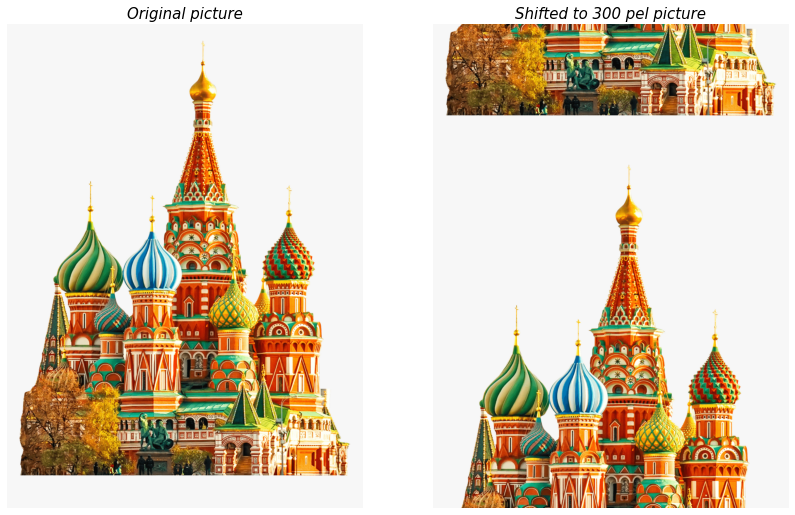

In [466]:
import numpy as np
from PIL import Image

process = np.arange(1, 8)
calculation_time = []
memory_list = []

for i in process:
    
    result = !mpiexec -np {i} python shifted_picture.py
    calculation_time.append(float(result[0]))
    memory_list.append(float(result[1]))
    
image1 = Image.open('moscow.png')
image2 = Image.open('shifted_picture.png')
fig, (ax, bx) = plt.subplots(1, 2, figsize = (14, 10))
ax.imshow(image1)
ax.set_title('Original picture', fontsize = 15, fontstyle = 'oblique')
ax.set_axis_off()
bx.imshow(image2)
bx.set_title('Shifted to 300 pel picture', fontsize = 15, fontstyle = 'oblique')
bx.set_axis_off()
    
speedup = []
    
for i in calculation_time:
    speedup.append(calculation_time[0] / i)

## Creation of animation

In [61]:
%%writefile shifted_picture_ciclically.py

from PIL import Image
import numpy as np
from mpi4py import MPI
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("-inp", "--input", type = str, default = 'no_name_input', help = "Name of input file.")
parser.add_argument("-o", "--output", type = str, default = 'no_name_output', help = "Name of output file.")
parser.add_argument("-s", "--shift", type = int, default = 1, help = "How many pixels should be shifted.")
args = parser.parse_args()

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

image_name = args.input
print(image_name)
image = Image.open(image_name)
arr_image = np.asarray(image)

height = arr_image.shape[0]
width = arr_image.shape[1]

index = np.linspace(0, width, size + 1, dtype = int)
width_rank = index[rank + 1] - index[rank]
image_rank = arr_image[:, index[rank]:index[rank+1]]
image_temp = np.roll(image_rank, args.shift, axis = 0)

data = comm.gather(image_temp, root = 0)
   
if rank == 0:
    value = np.concatenate(tuple(data), axis = 1)   
    pilImage = Image.fromarray(value, mode = "RGBA")
    pilImage.save(args.output)
        

Overwriting shifted_picture_ciclically.py


In [65]:
import imageio.v2 as imageio

images = []
number_of_steps = int(1171 / 16)
for i in range(number_of_steps):
    !mpiexec -np 8 python shifted_picture_ciclically.py -inp f"{i}.png" -o f"{i+1}.png" -s 16
for i in range(number_of_steps + 1):
    images.append(imageio.imread(f'f{i}.png'))
imageio.mimsave('movie.gif', images)

f0.png
f0.png
f0.png
f0.png
f0.png
f0.png
f0.png
f0.png
f1.png
f1.png
f1.png
f1.png
f1.png
f1.png
f1.png
f1.png
f2.png
f2.png
f2.png
f2.png
f2.png
f2.png
f2.png
f2.png
f3.png
f3.png
f3.png
f3.png
f3.png
f3.png
f3.png
f3.png
f4.png
f4.png
f4.png
f4.png
f4.png
f4.png
f4.png
f4.png
f5.png
f5.png
f5.png
f5.png
f5.png
f5.png
f5.png
f5.png
f6.png
f6.png
f6.png
f6.png
f6.png
f6.png
f6.png
f6.png
f7.png
f7.png
f7.png
f7.png
f7.png
f7.png
f7.png
f7.png
f8.png
f8.png
f8.png
f8.png
f8.png
f8.png
f8.png
f8.png
f9.png
f9.png
f9.png
f9.png
f9.png
f9.png
f9.png
f9.png
f10.png
f10.png
f10.png
f10.png
f10.png
f10.png
f10.png
f10.png
f11.png
f11.png
f11.png
f11.png
f11.png
f11.png
f11.png
f11.png
f12.png
f12.png
f12.png
f12.png
f12.png
f12.png
f12.png
f12.png
f13.png
f13.png
f13.png
f13.png
f13.png
f13.png
f13.png
f13.png
f14.png
f14.png
f14.png
f14.png
f14.png
f14.png
f14.png
f14.png
f15.png
f15.png
f15.png
f15.png
f15.png
f15.png
f15.png
f15.png
f16.png
f16.png
f16.png
f16.png
f16.png
f16.png
f16.png


## Plot of speedup vs number of processes

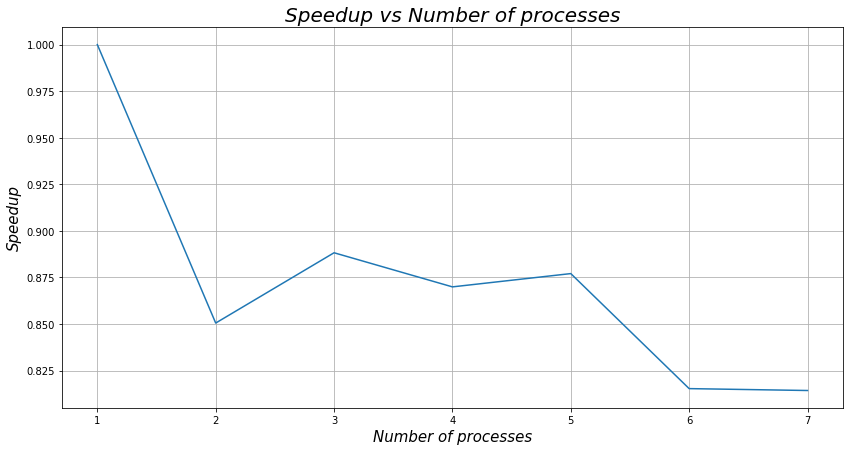

In [451]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (14, 7))

ax.plot(process, speedup)
ax.set_title('Speedup vs Number of processes', fontsize = 20, fontstyle = 'oblique')

plt.xlabel('Number of processes', fontsize = 15, fontstyle = 'oblique')
plt.ylabel('Speedup', fontsize = 15, fontstyle = 'oblique')

plt.grid(True)

plt.show()

## Plot of memory consumption vs number of processes

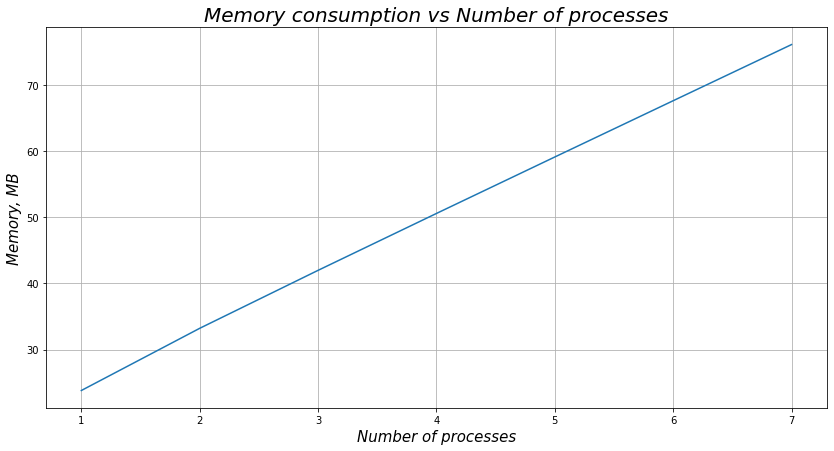

In [452]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (14, 7))

ax.plot(process, memory_list)
ax.set_title('Memory consumption vs Number of processes', fontsize = 20, fontstyle = 'oblique')

plt.xlabel('Number of processes', fontsize = 15, fontstyle = 'oblique')
plt.ylabel('Memory, MB', fontsize = 15, fontstyle = 'oblique')

plt.grid(True)

plt.show()